# NLP (Spam and Ham identification)

In [1]:
# use spam.csv dataset from sms-spam-collection-dataset.zip
import pandas as pd
ham_spam_data = pd.read_csv("spam.csv",encoding="ISO-8859-1")
ham_spam_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
ham_spam_data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)
ham_spam_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
ham_spam_data=ham_spam_data.rename(columns={"v1":"label", "v2":"text"})
ham_spam_data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# 1. Create a word cloud to analyse the ham data
from wordcloud import WordCloud

In [5]:
spam_list = ham_spam_data[ham_spam_data["label"] == "spam"]["text"].unique().tolist()
ham_list = ham_spam_data[ham_spam_data["label"] == "ham"]["text"].unique().tolist()

In [6]:
spam = "".join(spam_list)
ham = "".join(ham_list)

In [7]:
spam_wc = WordCloud().generate(spam)
ham_wc = WordCloud().generate(ham)

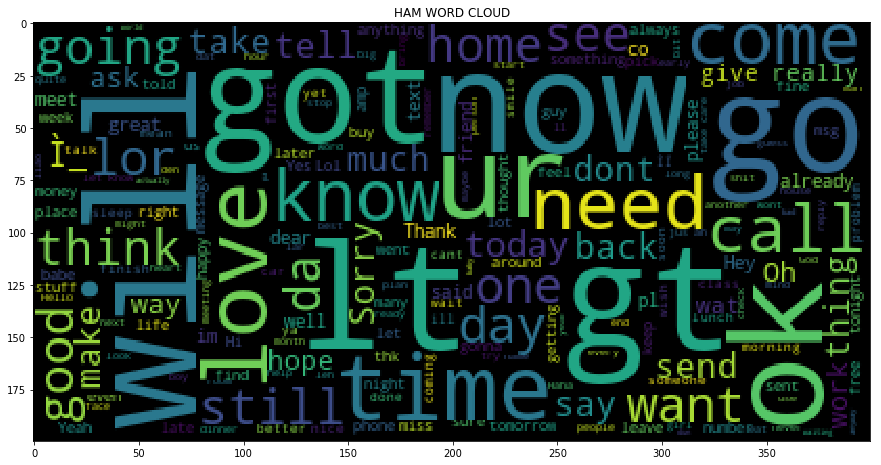

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.title("HAM WORD CLOUD")
plt.imshow(ham_wc)
plt.show()

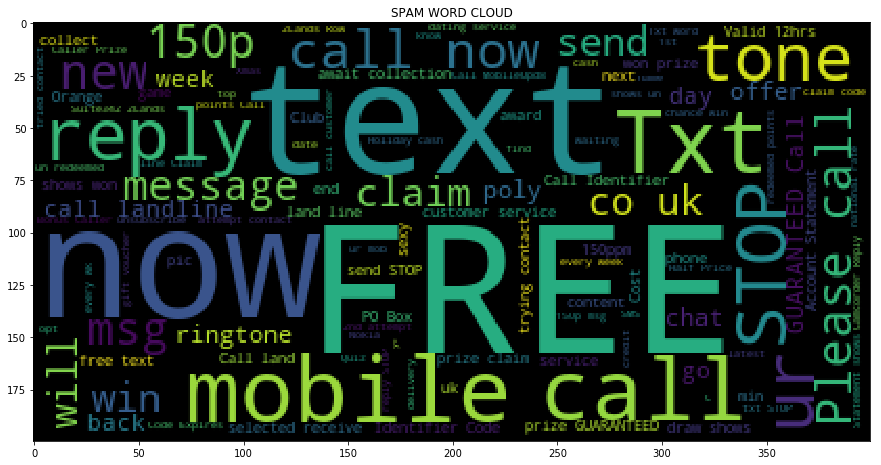

In [9]:
plt.figure(figsize=(15,10))
plt.title("SPAM WORD CLOUD")
plt.imshow(spam_wc)
plt.show()

In [10]:
# 2. create a custom bag of words
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

# creating bag of words
ham_spam_data['text'] = ham_spam_data['text'].str.lower()
ham_spam_data['text'] = ham_spam_data['text'].str.replace('[^a-z]', ' ')
#ham_spam_data['text'] = ham_spam_data['text'].str.split()
ham_spam_data.head()

,label,text
0,ham,go until jurong point crazy available only ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives aro...


In [11]:
# 3. remove stop words from the bag of words
import copy

ham_spam_data_bkp = copy.deepcopy(ham_spam_data)
#ham_spam_data_bkp['text'] = ham_spam_data_bkp['text'].apply(lambda x:[word for word in x if word not in set(stopwords.words('english'))])
#ham_spam_data_bkp.head()

ps = PorterStemmer()

ham_spam_data_bkp['text'] = ham_spam_data_bkp['text'].str.lower().str.replace('[^a-z]', ' ').str.split()
ham_spam_data_bkp['text'] = ham_spam_data_bkp['text'].apply(lambda x: ' '.join([ps.stem(word) for word in x if word not in set(stopwords.words('english'))]))

ham_spam_data_bkp.head()

,label,text
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt st m...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah think goe usf live around though


In [12]:
# 3. using numpy create count vectors for the text data using bag of words
count_vector = CountVectorizer()
count_vector.fit(ham_spam_data_bkp.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [13]:
X = count_vector.transform(ham_spam_data_bkp.text).toarray()
X.shape

(5572, 6221)

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(ham_spam_data_bkp.label)
y[:30]

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Naive Bayes 

In [15]:
# 4. fit the naive bayes model with above vectors and compare the accuracy with existing model
# import Naive bayes classifier
from sklearn.naive_bayes import MultinomialNB

# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [16]:
# fit the classifier model
clf = MultinomialNB()

In [17]:
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
# predict the outcome for testing data
predictions = clf.predict(X_test)
predictions.shape

(1393,)

In [19]:
# check the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9791816223977028

## Comparing actual and predicted labels

In [20]:
# select 20 records
test_data = ham_spam_data_bkp.head(10).text.tolist() + ham_spam_data_bkp.tail(10).text.tolist()
actual_label = ham_spam_data_bkp.head(10).label.tolist() + ham_spam_data_bkp.tail(10).label.tolist()
len(test_data)

20

In [21]:
test_preds = clf.predict(count_vector.transform(test_data))
test_preds.shape

(20,)

In [22]:
# print actual vs predicted
i = 0
for sms, label in zip(test_data, actual_label):
    print(str(test_data[i][:50]) +" ("+ str(actual_label[i]) +") => "+ str(test_preds[i]) )
    i += 1

go jurong point crazi avail bugi n great world la  (ham) => 0
ok lar joke wif u oni (ham) => 0
free entri wkli comp win fa cup final tkt st may t (spam) => 1
u dun say earli hor u c alreadi say (ham) => 0
nah think goe usf live around though (ham) => 0
freemsg hey darl week word back like fun still tb  (spam) => 1
even brother like speak treat like aid patent (ham) => 0
per request mell mell oru minnaminungint nurungu v (ham) => 0
winner valu network custom select receivea prize r (spam) => 1
mobil month u r entitl updat latest colour mobil c (spam) => 1
ok lor soni ericsson salesman ask shuhui say quit  (ham) => 0
ard like dat lor (ham) => 0
wait til least wednesday see get (ham) => 0
huh lei (ham) => 0
remind get pound free call credit detail great off (spam) => 1
nd time tri contact u u pound prize claim easi cal (spam) => 1
b go esplanad fr home (ham) => 0
piti mood suggest (ham) => 0
guy bitch act like interest buy someth els next we (ham) => 0
rofl true name (ham) => 0


## Decisoin Tree

In [23]:
# import the DT classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini')

In [24]:
# fit the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
# predict the outcome for testing data
predictions = clf.predict(X_test)
predictions.shape

(1393,)

In [26]:
# check the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9763101220387652

## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=5)

In [28]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
# predict the outcome for testing data
predictions = clf.predict(X_test)
predictions.shape

(1393,)

In [30]:
# check the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9691313711414213

## SVM

In [31]:
# import the SVC 
from sklearn.svm import SVC
clf = SVC()

In [32]:
# fit the classifier
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
# predict the outcome for testing data
predictions = clf.predict(X_test)
predictions.shape

(1393,)

In [34]:
# check the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.8585786073223259

# Analysis 

## Naive Bayes

> accuracy : 0.9791816223977028

## Decision Tree

> accuracy : 0.9755922469490309

## Random Forest

> accuracy : 0.9669777458722182

## SVM

> accuracy : 0.8585786073223259